<h1>Linear Regression<h1>

Linear regression is a supervised machine learning algorithm used to predict a numerical value given a set of features or independent variables. It is a type of regression analysis that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. The linear regression algorithm is used to uncover the correlation between variables and predict future outcomes. It is used in a wide range of applications, such as predicting housing prices, analyzing risk in financial markets, and forecasting sales and demand.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
df.head()

,area,price
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [4]:
x=np.array(df['area']) #independent variable
y=np.array(df['price']) #dependent variable

In [5]:
np.vstack((x,y))

array([[  8450,   9600,  11250, ...,   9042,   9717,   9937],
       [208500, 181500, 223500, ..., 266500, 142125, 147500]], dtype=int64)

## Normal equation Method

## Formula :<br>
<pre style="font-family:verdana;">    Main Equation : y=wx+b (which is much similar to the straight line equation y=mx+c)<br>
         here w is called the coefficient<br>
                 b is called the intercept<br><br>
    To find w : w=r*(std(y)/std(x))<br>
         where r=(sum((x-x_mean)*(y-y_mean))/sqrt(sum(x-x_mean)**2 * sum(y-y_mean)**2)))<br><br>
    To find a : b=w*x_mean-y_mean
</pre>    

In [6]:
def fit(x_value,y_value):
    
    x_mean=np.mean(x_value)
    y_mean=np.mean(y_value)
    numerator=0
    denominator_x=0
    denominator_y=0
    
    for i in range(len(x)):
        numerator+=(x_value[i]-x_mean)*(y_value[i]-y_mean)
        denominator_x+=(x_value[i]-x_mean)**2
        denominator_y+=(y_value[i]-y_mean)**2
        
    r=numerator/np.sqrt(denominator_x*denominator_y)
    
    f_w=r*(np.std(y_value)/np.std(x_value))
    f_b=abs(f_w*x_mean-y_mean)
    
    Y=f_w*x+f_b
    
    return f_w,f_b

In [7]:
def predict(x_value,f_w,f_b):
    return f_w*x_value+f_b  #formula for the final equation

In [8]:
formula_predict_value=[]
f_w,f_b=fit(x,y)
formula_predict_value.extend(predict(x,f_w,f_b)) 

## Scikit Learn library Method

In [9]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(pd.DataFrame(x),y)  #training the model
model_predict_value=model.predict(pd.DataFrame(x))    #testing the model

<b>Comparing the manual value with the library model value<b>

In [10]:
print(model.coef_[0],f_w)
print(model.intercept_,f_b)

2.0999719517076754 2.09997195170768
158836.15189687657 158836.15189687654


In [11]:
predict={'formula_predict':formula_predict_value,'model_predict':model_predict_value}
result=pd.DataFrame(predict,columns=predict.keys())

In [12]:
result.head()

,formula_predict,model_predict
0,176580.914889,176580.914889
1,178995.882633,178995.882633
2,182460.836354,182460.836354
3,178890.884036,178890.884036
4,188781.751928,188781.751928


## Gradient Descent

## Formula<br>
<pre style="font-family:verdana;">To update the weight and bias values:
        w=w-L*dw
        b=b-L*db
        here w is weight 
                b is bias
                L is learning rate
                dw is change in the weight
                db is change in the bias
To find dw,db
       dw=sum((w*x+b-y)*w)/n
       db=sum(w*x+b-y)/n
</pre>

In [13]:
# Manual Method Using Gradient descent

def difference(x,y,w,b):
    
    n=len(x)
    dj_db=0
    dj_dw=0
    
    for i in range(n):
        f_x=w*x[i]+b
        dj_db+=(f_x-y[i])
        dj_dw+=(f_x-y[i])*x[i]
        
    dj_db/=n
    dj_dw/=n
    
    return dj_db,dj_dw

In [15]:
def gradient_descent(x,y,w,b,learning_rate,n):
    
    error=[error_rate(x,y,w,b)]    #this function error_rate is decleared bellow in the error section, so run it before running this cell
    w_values=[w]
    b_values=[b]
    
    for i in range(n):
        db,dw=difference(x,y,w,b)
        w=w-learning_rate*dw
        b=b-learning_rate*db
        
        error.append(error_rate(x,y,w,b))   
        w_values.append(w)
        b_values.append(b)
        
    size=len(error)
    df=pd.DataFrame({'error':error,'w':w_values,'b':b_values})
    print(df.tail())
    
    print("\nThe final error rate is :",error[size-1])
    
    plt.figure(figsize=(20,10))
    plt.plot(w_values,error,marker='.',markersize=1)
    plt.xlabel("Weight_values",fontsize=20)
    plt.ylabel("Error_values",fontsize=20)
    
    return w,b

             error          w         b
2996  1.899136e+16  10.048309  2.029363
2997  1.899136e+16  10.048309  2.030041
2998  1.899136e+16  10.048309  2.030718
2999  1.899136e+16  10.048309  2.031395
3000  1.899136e+16  10.048309  2.032072

The final error rate is : 1.8991362509292676e+16


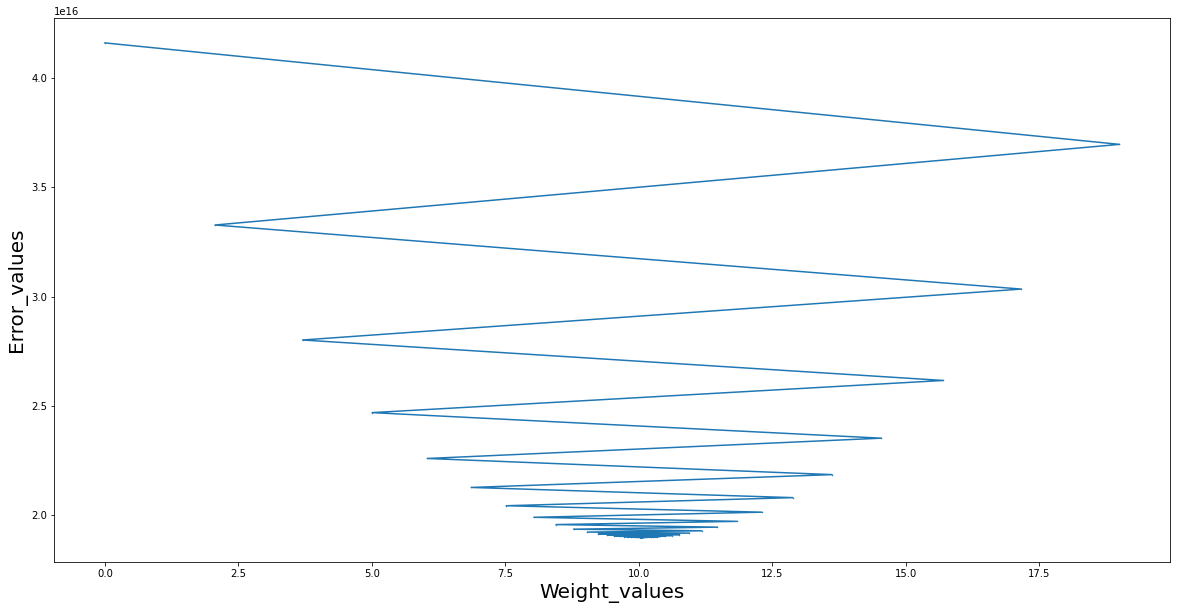

In [16]:
w,b=gradient_descent(x,y,0,0,0.000000009,3000)  #trying the gradient descent without proper bias and weight value

             error         w              b
2996  6.253850e+15  2.099972  158836.152002
2997  6.253850e+15  2.099972  158836.152002
2998  6.253850e+15  2.099972  158836.152002
2999  6.253850e+15  2.099972  158836.152002
3000  6.253850e+15  2.099972  158836.152002

The final error rate is : 6253850212170168.0


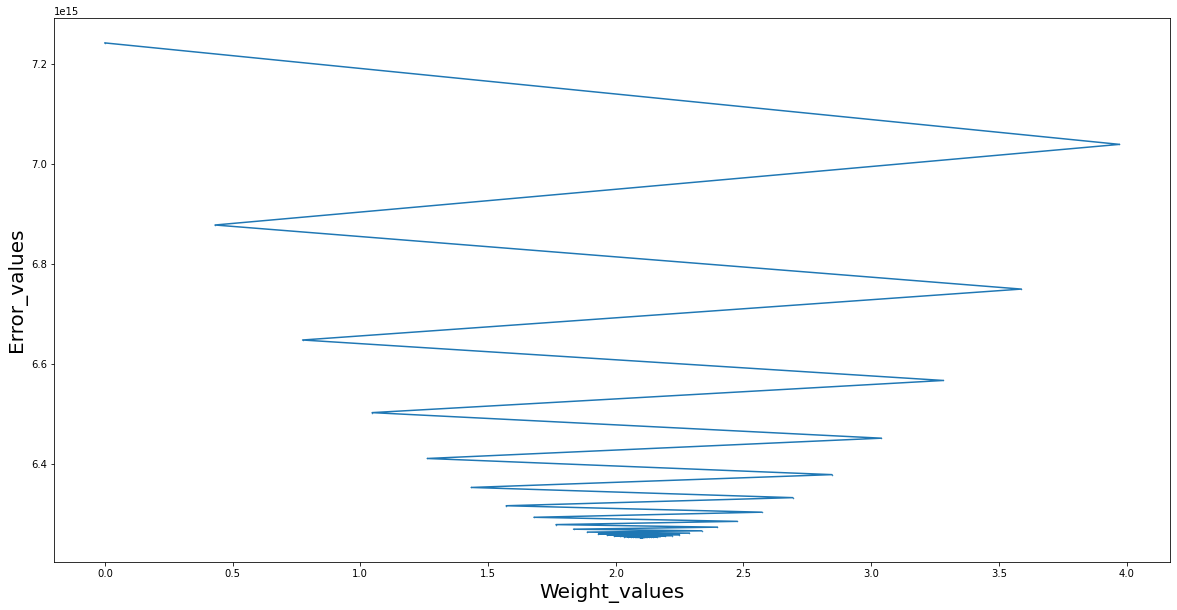

In [17]:
w,b=gradient_descent(x,y,0,158836.15189687654,0.000000009,3000)  #Fixing the perfect bias and weight value

Here you can see that the graph converging to a minimum value near the waight value 2.The most important thing in gradient descenting is parameter tuning, means changing the weight,bias,learning rate and number of iterations values to find the perfect fit of the model

## ERROR

## formula
<pre style="font-family:verdana;">error=sum((y-y^)**2)/2*n
here y is original value 
        y^(pronounced as y cap) is the predicted value
</per> 

In [14]:
def error_rate(x,y,w,b):
    error=0
    for i in range(len(x)):
        pre=x[i]*w+b
        error+=(pre-y[i])**2
    return error/2*len(y)

In [18]:
f_error=error_rate(x,y,f_w,f_b)
print("Manually error value :",f_error)

Manually error value : 6253850212170179.0


In [19]:
l_error=error_rate(x,y,model.coef_[0],model.intercept_)
print("Library function error value :",l_error)

Library function error value : 6253850212170178.0


In [20]:
f_g_error=error_rate(x,y,w,b)
print("Gradient descent error value :",f_g_error)

Gradient descent error value : 6253850212170168.0


Text(0, 0.5, 'Error')

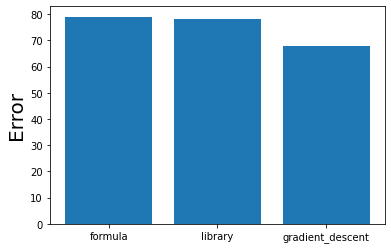

In [21]:
plt.bar(['formula','library','gradient_descent'],[f_error%100,l_error%100,f_g_error%100])
plt.ylabel('Error',fontsize=20)

here you can see that the gradient descent is performing low than the other methods without scaling

In [22]:
result['gradient_descent']=x*w+b
result['original_value']=y

result.head()

,formula_predict,model_predict,gradient_descent,original_value
0,176580.914889,176580.914889,176580.914949,208500
1,178995.882633,178995.882633,178995.882688,181500
2,182460.836354,182460.836354,182460.836400,223500
3,178890.884036,178890.884036,178890.884091,140000
4,188781.751928,188781.751928,188781.751958,250000


## Scaling 

In [23]:
def z_up_scale(x):   #it converts all the values nearer to zero(simply like encoding)
    x_mean=np.mean(x)
    x_std=np.std(x)
    x_scaled=(x-x_mean)/x_std  #here we have used the z scaling methode
    
    return x_scaled,x_mean,x_std

In [24]:
def z_down_scale(x_value,x_mean,x_std):#it convert the converted values into original values(simply like decoding)
    return x_value*x_std+x_mean

In [25]:
x_scaled,x_mean,x_std=z_up_scale(x)
y_scaled,y_mean,y_std=z_up_scale(y)

Text(0.5, 1.0, 'After scaling')

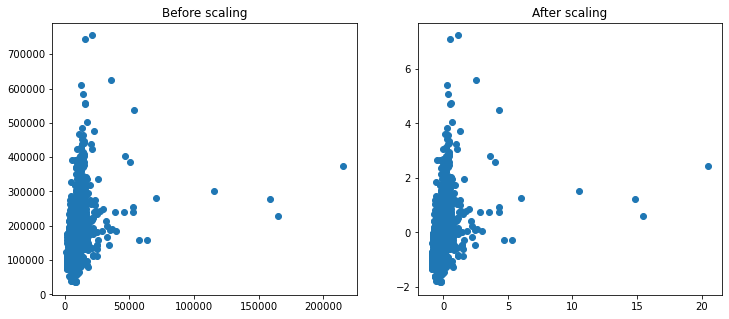

In [26]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
ax1.scatter(x,y)
ax1.set_title("Before scaling")

ax2.scatter(x_scaled,y_scaled)
ax2.set_title("After scaling")

Here you can see the values of x and y axis are changed to smaller values, without changing the structure of the data.

              error         w             b
996   991606.128466  0.263843  1.388007e-16
997   991606.128466  0.263843  1.387475e-16
998   991606.128466  0.263843  1.388159e-16
999   991606.128466  0.263843  1.387627e-16
1000  991606.128466  0.263843  1.388311e-16

The final error rate is : 991606.128465745


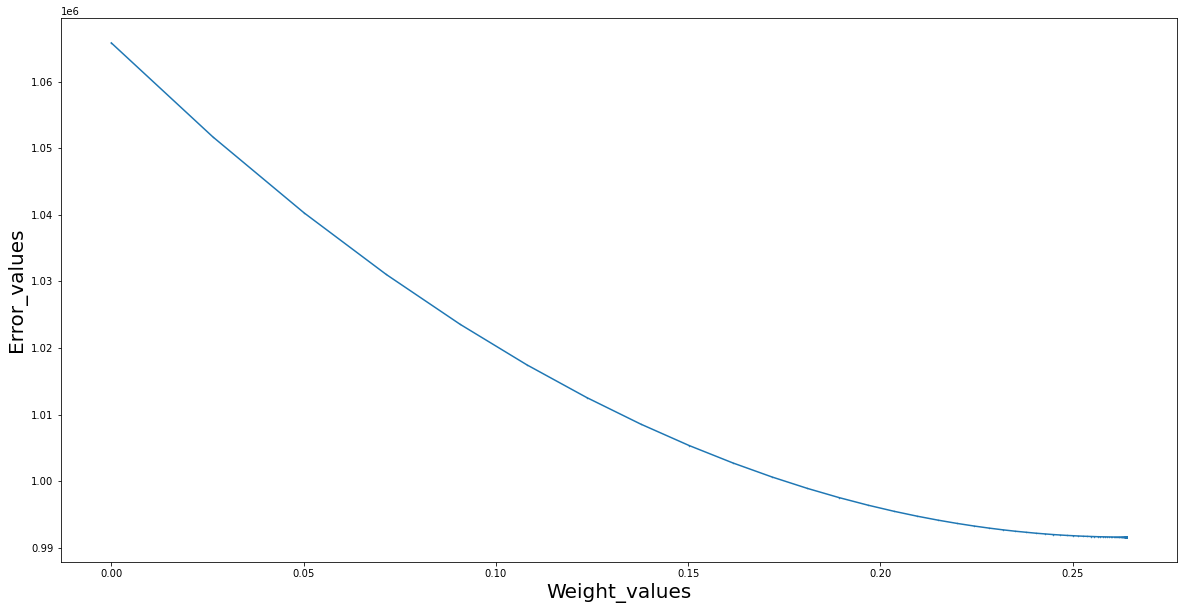

In [27]:
w,b=gradient_descent(x_scaled,y_scaled,0,0,0.1,1000)  #starting the gradient from zero bias and weight

In [28]:
model.fit(pd.DataFrame(x_scaled),y_scaled)
f_w,f_b=fit(x_scaled,y_scaled)

In [29]:
df['library_prediction']=z_down_scale(model.predict(pd.DataFrame(x_scaled)),y_mean,y_std)

df['equation_prediction']=z_down_scale(x_scaled*f_w+f_b,y_mean,y_std)

df['gradient_descenting']=z_down_scale(x_scaled*w+b,y_mean,y_std)

df.head()

,area,price,library_prediction,equation_prediction,gradient_descenting
0,8450,208500,176580.914889,176580.914889,176580.914889
1,9600,181500,178995.882633,178995.882633,178995.882633
2,11250,223500,182460.836354,182460.836354,182460.836354
3,9550,140000,178890.884036,178890.884036,178890.884036
4,14260,250000,188781.751928,188781.751928,188781.751928


Text(0.5, 1.0, 'Gradient Descent method')

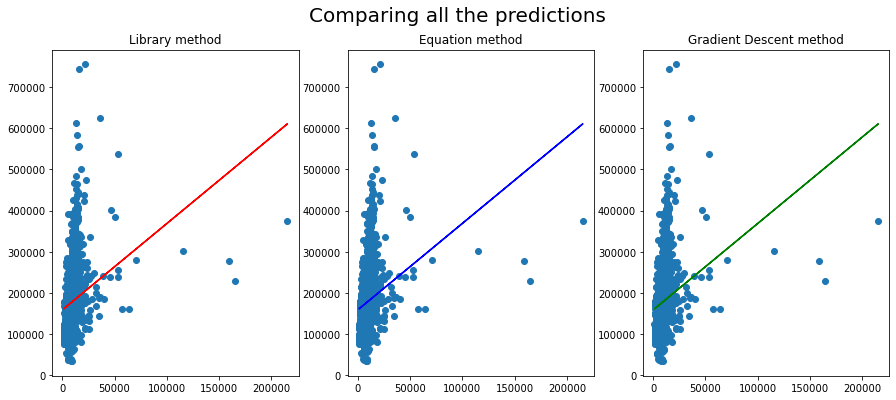

In [30]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,6))
fig.suptitle('Comparing all the predictions',fontsize=20)

ax1.scatter(x,y)
ax1.plot(x,df['library_prediction'],c='r')
ax1.set_title("Library method")

ax2.scatter(x,y)
ax2.plot(x,df['equation_prediction'],c='b')
ax2.set_title("Equation method")

ax3.scatter(x,y)
ax3.plot(x,df['gradient_descenting'],c='g')
ax3.set_title("Gradient Descent method")

In [31]:
f_error=error_rate(x_scaled,y_scaled,f_w,f_b)
print("Manually calculated value :",f_error)

Manually calculated value : 991606.128465745


In [32]:
l_error=error_rate(x_scaled,y_scaled,model.coef_[0],model.intercept_)
print("Library function calculated value :",l_error)

Library function calculated value : 991606.1284657451


In [33]:
g_error=error_rate(x_scaled,y_scaled,w,b)
print("Gradient descent error value :",g_error)

Gradient descent error value : 991606.128465745


In [34]:
def last_eight(num): #getting the last 9 numbers after the decimal point to compare  
    s=str(num-int(num))
    n=int(s[len(s)-10:])
    return n

Text(0, 0.5, 'Error')

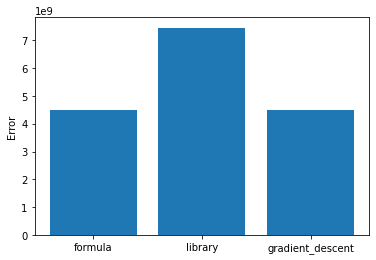

In [35]:
plt.bar(['formula','library','gradient_descent'],[last_eight(f_error),last_eight(l_error),last_eight(g_error)])
plt.ylabel('Error')

In [36]:
print("The difference of error before and after scaling is :",f_g_error-g_error)

The difference of error before and after scaling is : 6253850211178562.0


In [37]:
print(f_error==g_error) 

True


As you can see that the library methods has higher error then the other methods and formula method is equal to the gradient methods.I am not concluding that the library method is worse, with proper use of the parameters, the library function can work good. Still with proper tuning of the model gradient descent works even better.